<a href="https://colab.research.google.com/github/Archanamayacharya/daily-household-transaction-analysis/blob/main/Household_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Daily Household Transactions.csv")

# Convert date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Drop invalid dates
df = df.dropna(subset=['Date'])

# Clean and standardize text columns
text_cols = ['Mode', 'Category', 'Subcategory', 'Note', 'Income/Expense', 'Currency']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Fill missing text
df['Subcategory'] = df['Subcategory'].fillna('Unknown')
df['Note'] = df['Note'].fillna('Unknown')

# Drop duplicates if any
df = df.drop_duplicates()

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 2420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            1303 non-null   object        
 2   Category        1303 non-null   object        
 3   Subcategory     1303 non-null   object        
 4   Note            1303 non-null   object        
 5   Amount          1303 non-null   float64       
 6   Income/Expense  1303 non-null   object        
 7   Currency        1303 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 91.6+ KB
None
                 Date                   Mode        Category  \
0 2018-09-20 12:04:08                   Cash  Transportation   
1 2018-09-20 12:03:15                   Cash            Food   
3 2018-09-17 23:41:17  Saving Bank Account 1    Subscription   
4 2018-09-16 17:15:08                   Cash  

2. Exploratory Data Analysis (EDA)

💰 Total Income: 2,682,606.70
💸 Total Expense: 672,562.55
💵 Net Savings: 2,010,044.15


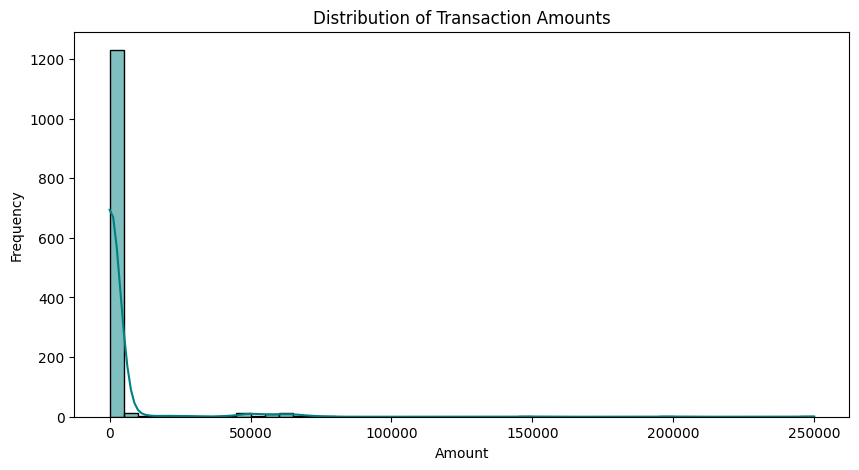

/tmp/ipython-input-3367096977.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Income/Expense', y='Amount', palette='Set2')


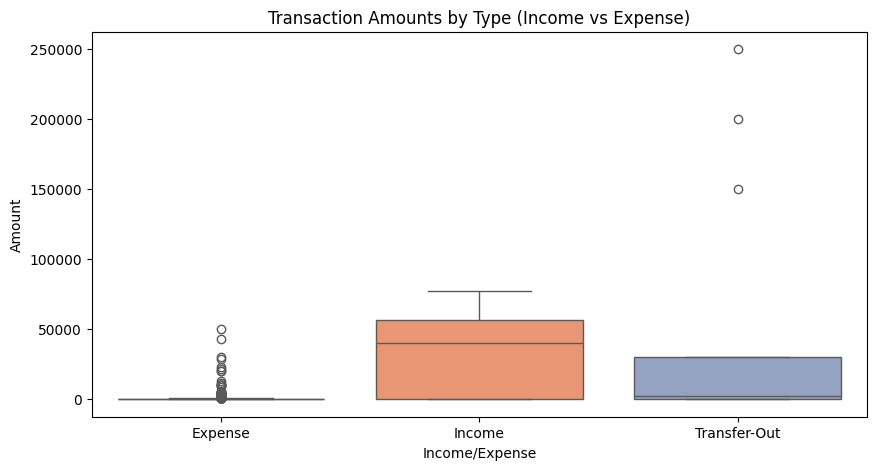

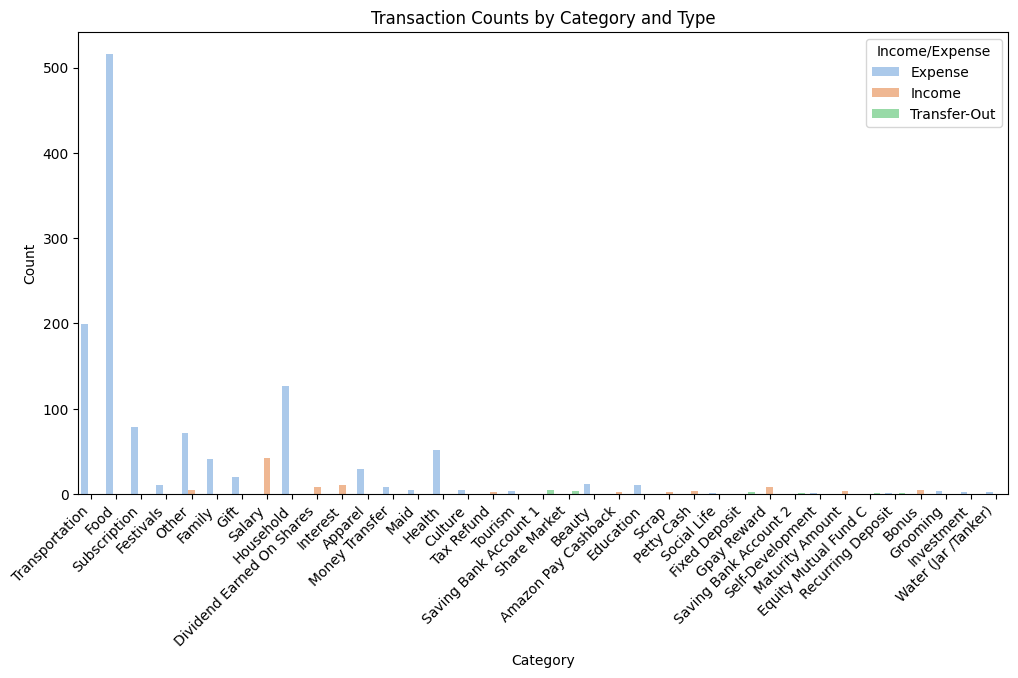

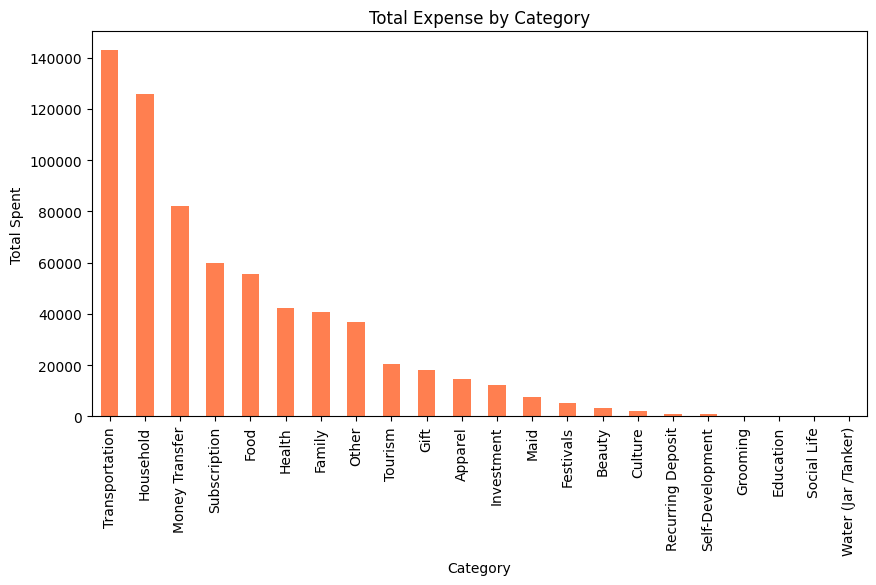

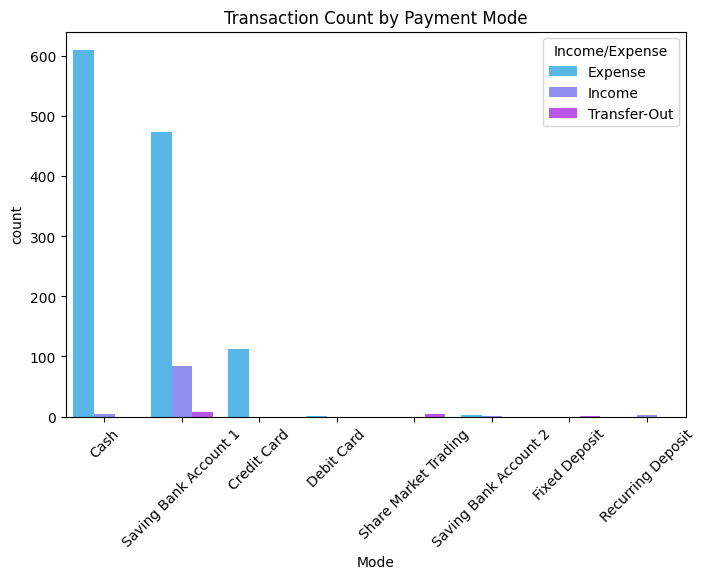

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 📊 1. Basic Financial Overview
# ===============================
total_income = df.loc[df['Income/Expense'] == 'Income', 'Amount'].sum()
total_expense = df.loc[df['Income/Expense'] == 'Expense', 'Amount'].sum()
net_savings = total_income - total_expense

print(f"💰 Total Income: {total_income:,.2f}")
print(f"💸 Total Expense: {total_expense:,.2f}")
print(f"💵 Net Savings: {net_savings:,.2f}")

# ===============================
# 📦 2. Distribution of Transaction Amounts
# ===============================
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='teal')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Separate by Income/Expense
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Income/Expense', y='Amount', palette='Set2')
plt.title("Transaction Amounts by Type (Income vs Expense)")
plt.ylabel("Amount")
plt.show()

# ===============================
# 🏷️ 3. Transaction Counts by Category and Type
# ===============================
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', hue='Income/Expense', palette='pastel')
plt.title("Transaction Counts by Category and Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.show()

# ===============================
# 📁 4. Expense Breakdown by Category
# ===============================
expense_by_category = (
    df[df['Income/Expense'] == 'Expense']
    .groupby('Category')['Amount']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
expense_by_category.plot(kind='bar', color='coral')
plt.title("Total Expense by Category")
plt.ylabel("Total Spent")
plt.show()

# ===============================
# 💳 5. Payment Mode Distribution
# ===============================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Mode', hue='Income/Expense', palette='cool')
plt.title("Transaction Count by Payment Mode")
plt.xticks(rotation=45)
plt.show()

3. Time Series Analysis

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


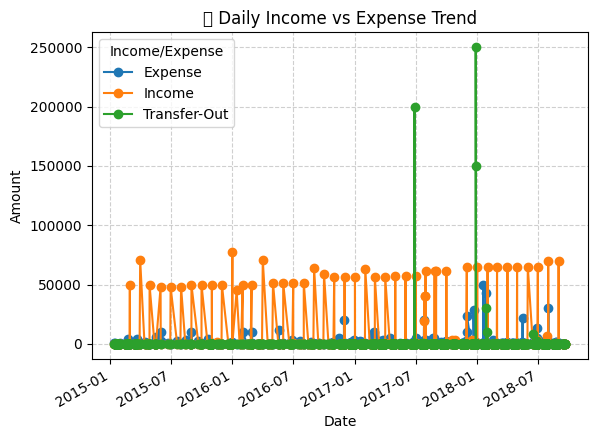

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


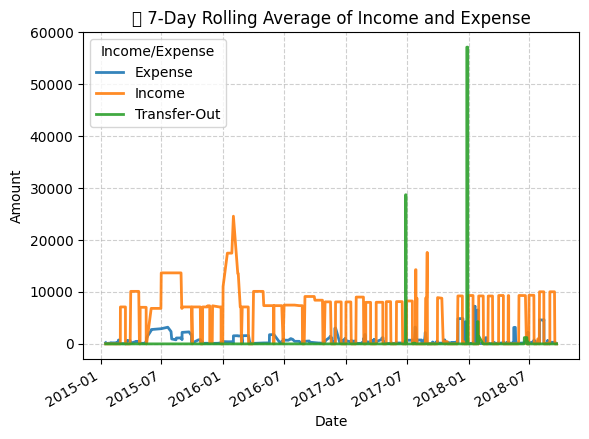

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


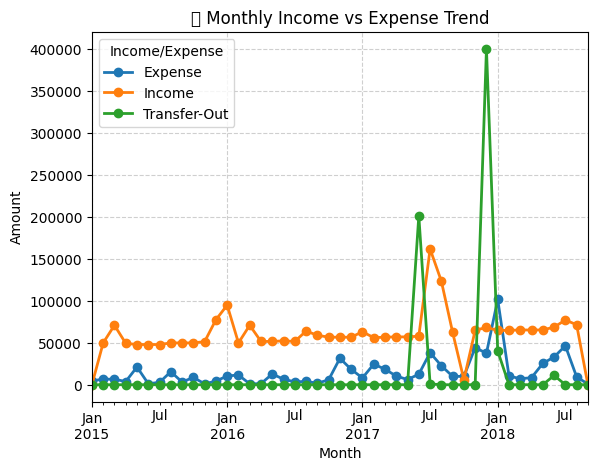

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


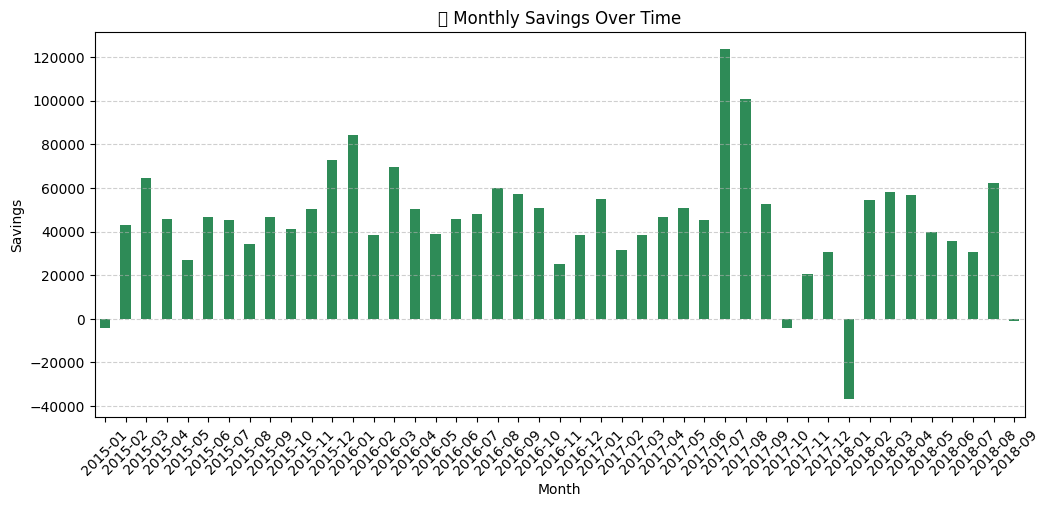

In [ ]:
# ===============================
# 📅 TREND ANALYSIS — DAILY & MONTHLY
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- DAILY TREND ---
daily_trend = (
    df.groupby(['Date', 'Income/Expense'])['Amount']
    .sum()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(12,6))
daily_trend.plot(marker='o', linewidth=1.5)
plt.title("📆 Daily Income vs Expense Trend")
plt.ylabel("Amount")
plt.xlabel("Date")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Add a rolling average for smoother trend
rolling_trend = daily_trend.rolling(window=7).mean()  # 7-day moving average
plt.figure(figsize=(12,6))
rolling_trend.plot(linewidth=2, alpha=0.9)
plt.title("📈 7-Day Rolling Average of Income and Expense")
plt.ylabel("Amount")
plt.xlabel("Date")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- MONTHLY TREND ---
df['YearMonth'] = df['Date'].dt.to_period('M')

monthly_trend = (
    df.groupby(['YearMonth', 'Income/Expense'])['Amount']
    .sum()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(12,6))
monthly_trend.plot(marker='o', linewidth=2)
plt.title("📊 Monthly Income vs Expense Trend")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Monthly savings
monthly_trend['Savings'] = monthly_trend['Income'] - monthly_trend['Expense']

plt.figure(figsize=(12,5))
monthly_trend['Savings'].plot(kind='bar', color='seagreen')
plt.title("💰 Monthly Savings Over Time")
plt.ylabel("Savings")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

4. Correlation Analysis

🔍 Top category correlations:

Category             Category           
Water (Jar /Tanker)  Water (Jar /Tanker)    1.000000
Transportation       Social Life            0.991646
Health               Self-Development       0.965863
Culture              Health                 0.730430
Self-Development     Culture                0.702636
Grooming             Investment             0.632199
Culture              Money Transfer         0.512409
Self-Development     Apparel                0.411815
Apparel              Health                 0.392826
Maid                 Gift                   0.385815
dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


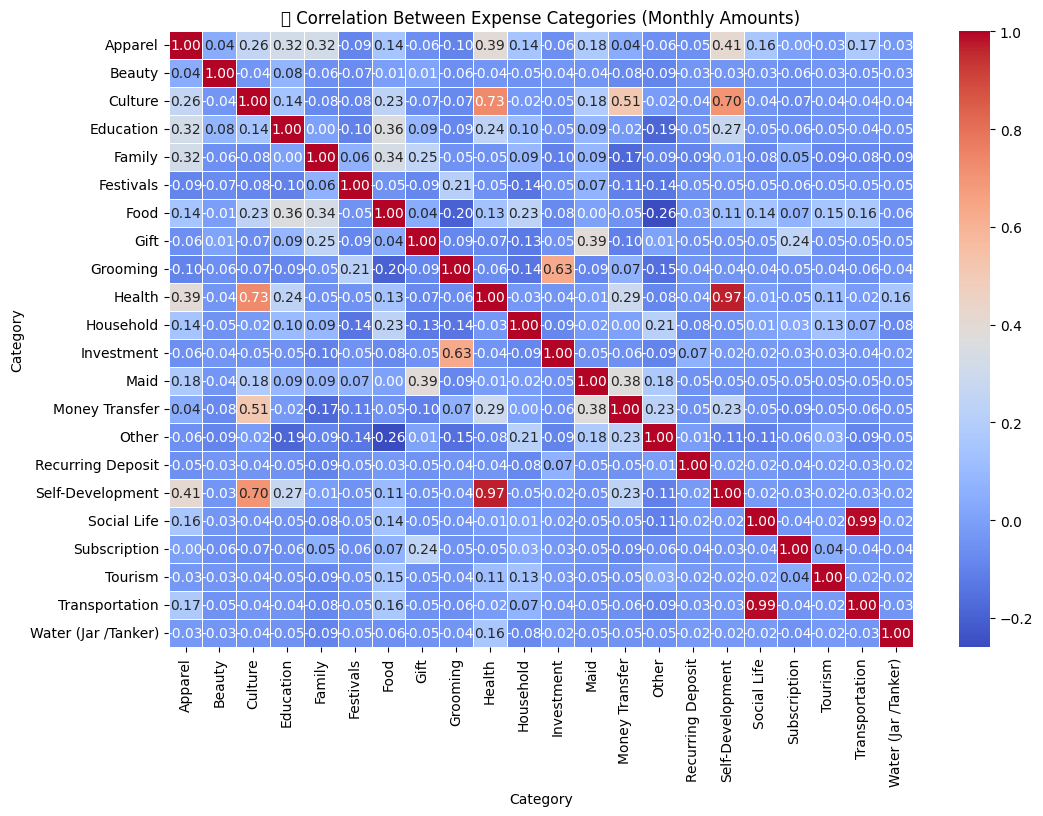

/tmp/ipython-input-716222269.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_amount_by_category, x='Category', y='Amount', palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


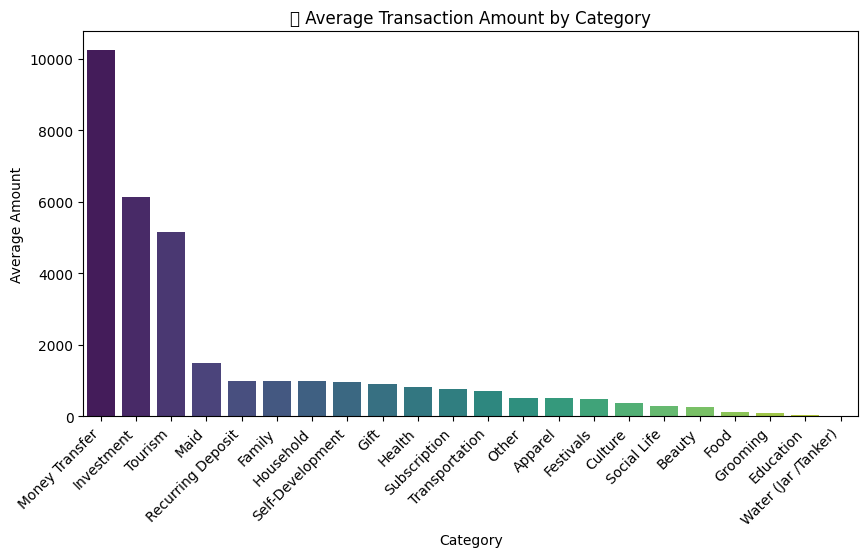

In [ ]:
# ===============================
# 🔗 CORRELATION ANALYSIS
# ===============================
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only expenses (since correlation of incomes and expenses together may distort insights)
expense_df = df[df['Income/Expense'] == 'Expense'].copy()

# Group by Category and Month for consistent comparison
expense_df['YearMonth'] = expense_df['Date'].dt.to_period('M')

# Create pivot: Categories as columns, Months as rows, values as total amount spent
category_month_pivot = (
    expense_df.groupby(['YearMonth', 'Category'])['Amount']
    .sum()
    .unstack()
    .fillna(0)
)

# Compute correlation matrix
corr_matrix = category_month_pivot.corr()

# Display top correlated categories (optional)
print("🔍 Top category correlations:\n")
print(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10))

# Heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Correlation Between Expense Categories (Monthly Amounts)")
plt.show()

# -------------------------------
# BONUS: Correlation between Category and Average Transaction Amount
# -------------------------------
avg_amount_by_category = expense_df.groupby('Category')['Amount'].mean().reset_index()
avg_amount_by_category = avg_amount_by_category.sort_values('Amount', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=avg_amount_by_category, x='Category', y='Amount', palette='viridis')
plt.title("💵 Average Transaction Amount by Category")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Amount")
plt.show()

Export Dataset for Power BI

In [ ]:
import pandas as pd

# Load your raw dataset
df = pd.read_csv("/content/Daily Household Transactions.csv")

# -----------------------------
# 🧼 1. Clean and Standardize Data
# -----------------------------

# Convert Date to datetime (handle multiple formats)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Drop invalid or missing dates
df = df.dropna(subset=['Date'])

# Strip extra spaces, title-case text columns
text_cols = ['Mode', 'Category', 'Subcategory', 'Note', 'Income/Expense', 'Currency']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Fill missing non-critical fields
df['Subcategory'] = df['Subcategory'].fillna('Unknown')
df['Note'] = df['Note'].fillna('Unknown')

# Remove duplicates
df = df.drop_duplicates()

# -----------------------------
# 📅 2. Add Derived Time Columns (great for Power BI filters)
# -----------------------------
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# -----------------------------
# 💾 3. Export the Cleaned Dataset
# -----------------------------
df.to_csv("Cleaned_Household_Transactions.csv", index=False)
print("✅ Cleaned data saved as 'Cleaned_Household_Transactions.csv'")
df.head()

✅ Cleaned data saved as 'Cleaned_Household_Transactions.csv'


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Year,Month,YearMonth,Day,Weekday
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 To Place 0,30.0,Expense,Inr,2018,September,2018-09,20,Thursday
1,2018-09-20 12:03:15,Cash,Food,Snacks,Idli Medu Vada Mix 2 Plates,60.0,Expense,Inr,2018,September,2018-09,20,Thursday
3,2018-09-17 23:41:17,Saving Bank Account 1,Subscription,Mobile Service Provider,Data Booster Pack,19.0,Expense,Inr,2018,September,2018-09,17,Monday
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh Idol,251.0,Expense,Inr,2018,September,2018-09,16,Sunday
5,2018-09-15 06:34:17,Credit Card,Subscription,Tata Sky,Permanent Residence - Tata Play Recharge,200.0,Expense,Inr,2018,September,2018-09,15,Saturday


In [ ]:
from google.colab import files
files.download("Cleaned_Household_Transactions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>